
# Project: Investigate a Dataset (No-show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset used for this analysis contains 110,527 medical appointments and 14 features from April to June, 2016 in Brazil. The number of patients that showed up for their appointments were 88,208 out of 110,527 patients.
>
> The features in this dataset include Age, AppointmentDay, Neighbourhood, Gender, etc. and below are the questions that will be explored in the course of this analysis.

>* Which days of the week and months are patients more likely to show up?
>
>* Which age category showed up for their appointments the most?
>
>* Does sending reminder messages make patients show up for their appointments?
>
>* Which hospital do patients frequent the most for their appointments?
>
>* Which patients (gender) show up for their appointments the least?
>
>* Do scholarshp patients show up more on weekdays or weekends for their appointments?
>
>* What percentage of patients schedule and show up for their appointments on the same day?


In [1]:
# importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#loading of the dataset
noshow_df = pd.read_csv("noshowappointments.csv")
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Checking the number of rows and columns of the dataset
noshow_df.shape

(110527, 14)

In [4]:
#Checking the columns information
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Checking the unique values of each column
noshow_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
#checking the descriptive statistics of the No-show dataset
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Checking for duplicate rows
sum(noshow_df.duplicated())

0

In [8]:
#Checking the data types of the features
noshow_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


### Data Cleaning (Fixing some inconsistencies in the dataset)

### Observations from the No-show dataset

> **Irrelevant columns**: Patient and Appointment ID 

> **Negative age value**: -1 was found in the Age column

> **Incorrect column names**: No-show, Hipertension and Handcap

> **Incorrect data types**: Scheduled day and Appointment day

> **Missing data**: None

> **Duplicates**: None

> **Mismatch number of records**: No-show column records were mismatched. 'No' in this dataset means that the patients showed up while 'Yes' means that they did not show up for their appointments.


#### Removing the **'PatientId'** and **'AppointmentID'** columns because they are unique to each patient and it would not be needed for this analysis.

In [9]:
#Dropping the 'Paitientid' and 'AppointmentID' columns
noshow_df.drop(columns=['PatientId', 'AppointmentID'], inplace = True)

In [10]:
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Removing the negative value in the 'Age' column because no age has a negative value

In [11]:
#Replacing negative values in the 'Age' column with NaN
noshow_df.replace(-1, np.nan, inplace = True)

In [12]:
#Checking for null values in the Age column
sum(noshow_df.Age.isnull())

1

In [13]:
#Using median imputation to fill the missing values
median = noshow_df['Age'].median()
noshow_df['Age'].fillna(median, inplace = True)

In [14]:
#Checking for null values in the Age column
sum(noshow_df.Age.isnull())

0

#### Renaming the incorrect column names ('No-show', 'Handcap', 'Hipertension') to ('No_show', 'Handicap', 'Hypertension')

In [15]:
#Renaming the wrongly spelt features
noshow_df.rename(columns = {'No-show':'No_show', 'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace =True)

In [16]:
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Changing the data types of 'ScheduledDay' and 'AppointmentDay' from object to datetime

In [17]:
#Changing the data types of the 'ScheduledDay' and 'AppointmentDay' column
noshow_df['ScheduledDay'] = pd.to_datetime(noshow_df['ScheduledDay'])
noshow_df['AppointmentDay'] = pd.to_datetime(noshow_df['AppointmentDay'])


In [18]:
noshow_df.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                      float64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                   object
dtype: object

#### Replacing the mismatched values in the No_show column with the correct values

In [19]:
#Replacing the unique values in the No_show column with 'Present' and 'Absent'
No_show_replacement = {"No" : "Present", "Yes" : "Absent"}
noshow_df["No_show"].replace(No_show_replacement, inplace = True)

In [20]:
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,Present
3,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,Present


### Feature Engineering

Extracting the date and time from the 'ScheduledDay' and 'AppointmentDay' columns

In [21]:
#Extracting the date from the 'ScheduledDay' and 'AppointmentDay' columns
noshow_df['Scheduled_date'] = noshow_df['ScheduledDay'].dt.date
noshow_df['Appointment_date'] = noshow_df['AppointmentDay'].dt.date

#Extracting the time from the 'ScheduledDay' column
noshow_df['Scheduled_time'] = noshow_df['ScheduledDay'].dt.time

Extracting the day, month and year from the 'ScheduledDay' and 'AppointmentDay' columns

In [22]:
#Function for extracting day_name, month_name and year
def feature_engineer(df, days, months, years, feature):
    df[days] = df[feature].dt.day_name()
    df[months] = df[feature].dt.month_name()
    df[years] = df[feature].apply(lambda x: x.year)
    
feature_engineer(noshow_df, 'Scheduled_day', 'Scheduled_month', 'Scheduled_year', 'ScheduledDay')
feature_engineer(noshow_df, 'Appointment_day', 'Appointment_month', 'Appointment_year', 'AppointmentDay')



#### Extracting the hour, minute and second from the 'Scheduled_time' column

In [23]:
##Extracting the hour, minute and second from the 'Scheduled_time'column
noshow_df['Scheduledtime_hour'] = noshow_df['Scheduled_time'].apply(lambda x: x.hour)
noshow_df['Scheduledtime_min'] = noshow_df['Scheduled_time'].apply(lambda x: x.minute)
noshow_df['Scheduledtime_sec'] = noshow_df['Scheduled_time'].apply(lambda x: x.second)


#### Extracting the different age groups from the 'Age' column

In [24]:
#Grouping the ages together to form different age groups for analysis. 
bin_edges = [0, 18, 37, 55, 115]
bin_names = ['Teens', 'Youth', 'Adult', 'Elderly']
noshow_df['Age_groups'] = pd.cut(noshow_df['Age'], bin_edges, labels = bin_names)
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Scheduled_day,Scheduled_month,Scheduled_year,Appointment_day,Appointment_month,Appointment_year,Scheduledtime_hour,Scheduledtime_min,Scheduledtime_sec,Age_groups
0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,...,Friday,April,2016,Friday,April,2016,18,38,8,Elderly
1,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,...,Friday,April,2016,Friday,April,2016,16,8,27,Elderly
2,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,...,Friday,April,2016,Friday,April,2016,16,19,4,Elderly
3,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,...,Friday,April,2016,Friday,April,2016,17,29,31,Teens
4,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,...,Friday,April,2016,Friday,April,2016,16,7,23,Elderly


#### Deleting some columns to avoid multi-collinearity

In [25]:
#Dropping some columns to avoid multi collinearity
noshow_df.drop(columns = ['ScheduledDay', 'AppointmentDay', 'Scheduled_date', 'Appointment_date', 'Age', 'Scheduled_time'], inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which days of the week and months are patients more likely to show up?

In [26]:
#Subsetting out the data where the patients showed up for their appointments.
showed_up = noshow_df[noshow_df['No_show'] == 'Present']
showed_up.head()

,Gender,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_day,Scheduled_month,Scheduled_year,Appointment_day,Appointment_month,Appointment_year,Scheduledtime_hour,Scheduledtime_min,Scheduledtime_sec,Age_groups
0,F,JARDIM DA PENHA,0,1,0,0,0,0,Present,Friday,April,2016,Friday,April,2016,18,38,8,Elderly
1,M,JARDIM DA PENHA,0,0,0,0,0,0,Present,Friday,April,2016,Friday,April,2016,16,8,27,Elderly
2,F,MATA DA PRAIA,0,0,0,0,0,0,Present,Friday,April,2016,Friday,April,2016,16,19,4,Elderly
3,F,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,Friday,April,2016,Friday,April,2016,17,29,31,Teens
4,F,JARDIM DA PENHA,0,1,1,0,0,0,Present,Friday,April,2016,Friday,April,2016,16,7,23,Elderly


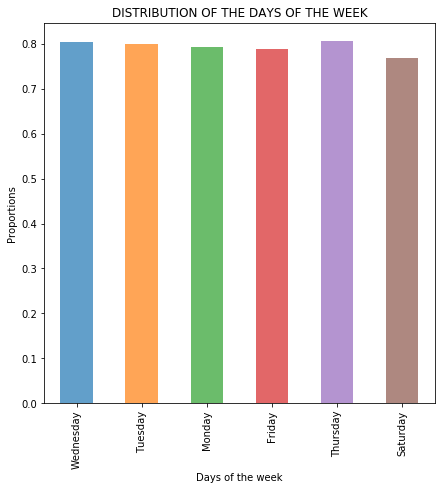

In [27]:
#function for proportions calculation
def proportion(counts, total):
    proportions = counts / total
    return proportions
#Function for the bar plots
def plot_kind(df, kind_type, XLABEL, YLABEL, TITLE):
    df.plot(kind = kind_type, subplots = False, figsize = (7,7), alpha = .7)
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.show();
count_day = showed_up.Appointment_day.value_counts()
total_day = noshow_df.Appointment_day.value_counts()
plot_kind(proportion(count_day, total_day), 'bar', 'Days of the week', 'Proportions', 'DISTRIBUTION OF THE DAYS OF THE WEEK')
#The plot shows the days of the week and their differnt proportions

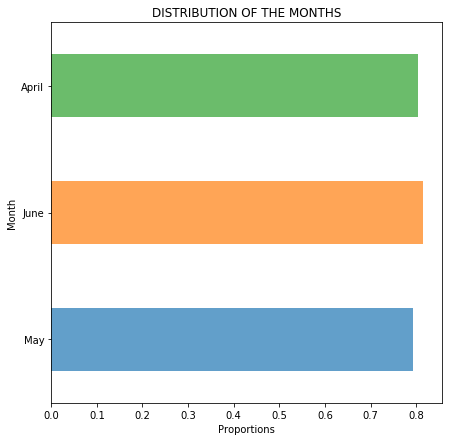

In [28]:
count_month = showed_up.Appointment_month.value_counts()
total_month = noshow_df.Appointment_month.value_counts()
plot_kind(proportion(count_month, total_month), 'barh', 'Proportions', 'Month', 'DISTRIBUTION OF THE MONTHS')
#The plot shows the months and their different proportions

### Patients showed up more on Thursday and in the month of June from the plots although their proportions with the other days of the week and months were very close.

### Question 2: Does sending reminder messages make patients show up for their appointments?

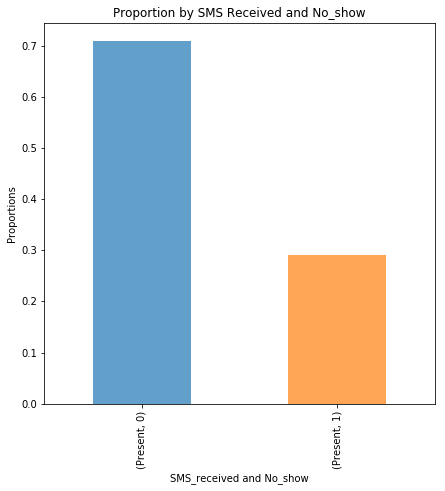

In [29]:
reminder_counts = showed_up.groupby(['No_show', 'SMS_received']).count()['Gender']
reminder_total = noshow_df.groupby('No_show').count()['Gender']
plot_kind(proportion(reminder_counts, reminder_total), 'bar', 'SMS_received and No_show', 'Proportions', 'Proportion by SMS Received and No_show')
#The plot below shows that the patients who didn't received the SMS showed up more than the ones who did

### **From the plot above, it can be seen that sending reminder messages does not affect the rate at which people show up for their appointments. The patients that didn't receive the reminder messages showed up for their appointments more than the patients that received the reminder messages.**

### Question 3: Which hospital do patients frequent the most for their appointments?

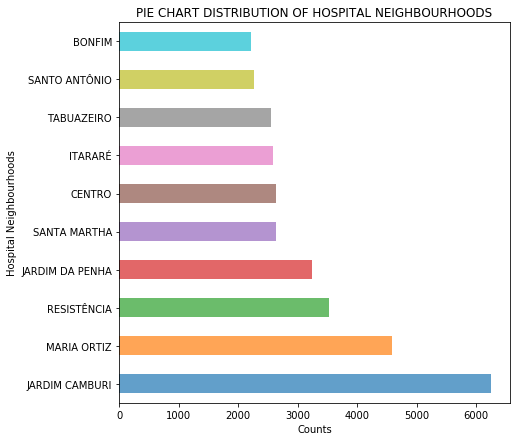

In [30]:
hospital_df = showed_up['Neighbourhood'].value_counts(sort = True).head(10)
plot_kind(hospital_df, 'barh', 'Counts', 'Hospital Neighbourhoods', 'PIE CHART DISTRIBUTION OF HOSPITAL NEIGHBOURHOODS')
#The plot below shows the top 10 hospital neighbourhoods that patients show up for their appointments the most.



### Patients visit the hospital in Jardim Camburi and Maria Ortiz neighbourhood the most for their appointments from the plot shown above.

### Question 4: Which day of the week do scholarship patients show up the least for their appointments ?

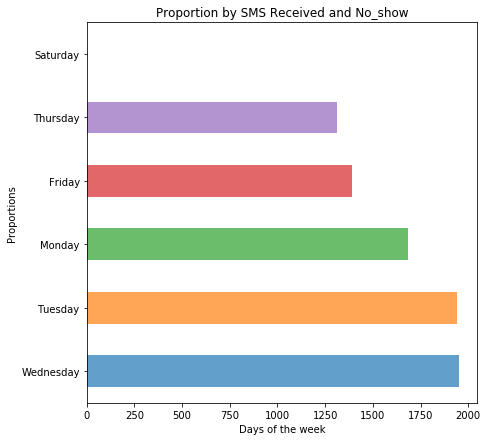

In [31]:
scholarship_df = showed_up.query('Scholarship == 1')
week_counts = scholarship_df.Appointment_day.value_counts(sort = True)
plot_kind(week_counts, 'barh', 'Days of the week', 'Proportions', 'Proportion by SMS Received and No_show')
#Plot showing the days that scholarship patients showed up the least.


### Scholarship students show up least for their appointments on Saturday and Thursday from the plot.

### Question 5: Which age category showed up for their appointments the most?

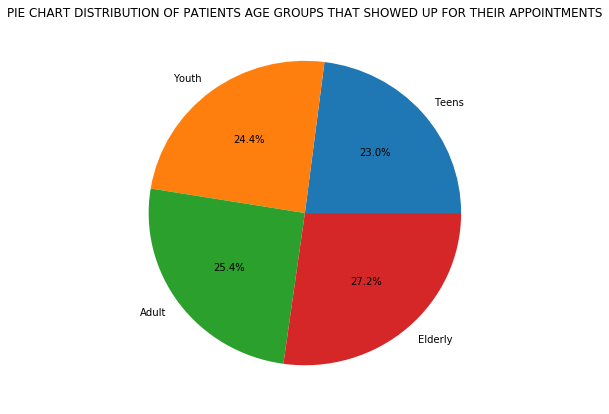

In [32]:
#Function for the pie plots
def plot_pie(df, kind_type, YLABEL, TITLE):
    df.plot(kind = kind_type, subplots = False, figsize = (7,7), autopct='%1.1f%%')
    plt.title(TITLE)
    plt.ylabel(YLABEL)
    plt.show();
    
age_df = showed_up.groupby('Age_groups').size()
plot_pie(age_df, 'pie', '', 'PIE CHART DISTRIBUTION OF PATIENTS AGE GROUPS THAT SHOWED UP FOR THEIR APPOINTMENTS')  
#The plot below shows he differnt distributions of age groups


### **From the plot above, it can be deduced that the elderly age group which is 55 years and above showed up the most with a percentage of 27.2 while the least was the Teens age group with 23.0%.**

### Question 6: Which patients (gender) show up for their appointments the least?

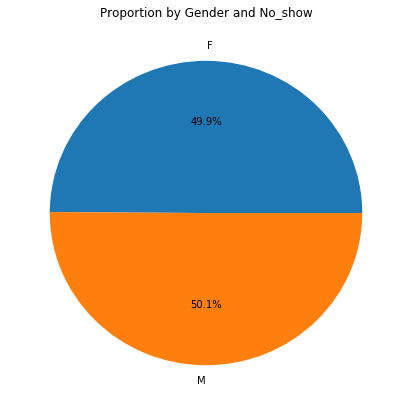

In [33]:
gender_counts = showed_up.groupby(['Gender']).count()['Hypertension']
gender_total = noshow_df.groupby('Gender').count()['Hypertension']
plot_pie(proportion(gender_counts, gender_total), 'pie', '', 'Proportion by Gender and No_show')  
#Plot showing the proportion of the patients gender that showed up the least


### The female patients showed up the least although the percentages of both genders are every close from the plot above.

### Question 7: What percentage of patients scheduled and showed up for their appointments on the same day?

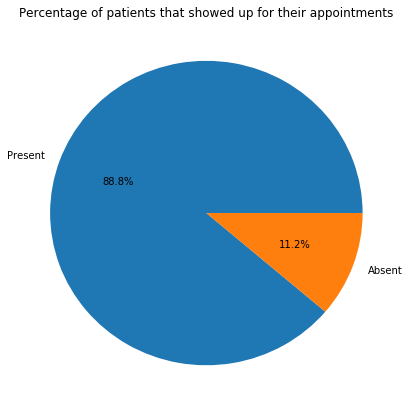

In [34]:
sche_app_day = noshow_df.query("Scheduled_day == Appointment_day")
sche_df = sche_app_day.No_show.value_counts(normalize = True)
plot_pie(sche_df, 'pie', '', 'Percentage of patients that showed up for their appointments')  
#Plot of patients that showed up on the same day as their scheduled and appointment day


### A large percentage of patients scheduled and showed up for their appointments on the same day from the plot above

<a id='conclusions'></a>
## Conclusions

> The dataset used for the final exploratory data analysis and visualizations contains 110,527 rows and 19 columns. A total of 10 new columns was generated for the analysis. The ScheduledDay, AppointmentDay, and Age features were used to generate new features.

> The handicap feature had some values like 2, 3 and 4 but the column was not cleaned because there was no information regarding it. The female patients were more than the male patients although their visit proportions was close.

> The hospital in JARDIM CAMBURI neighbourhood had the highest number of patients and the reminder messages did not affect the rate at which patients showed up for their appointments. There were 4 age groups which includes teens, adults, youth, and elderly and the elderly patients were the ones that visited the hospitals the most.

> 88% of Patients whose appointment and schedule days were on the same day showed up for their appointments.

> Patients showed up on all the days of the week except Sundays and the month (April, May, June) proportions were also close

## Limitations

> The patients who showed up for their appointments were more than those who didn't show up and this might cause bias in the final results.

> The handicap column contained some value inconsistencies like 2, 3, and 4 without any information in the data dictionary regarding it and therefore the column was not cleaned.

> The female patients were 33,153 more than the male patients in number and this will reflect in the analysis.